<a href="https://colab.research.google.com/github/miraculinp/Data-Science-Personal-Project/blob/main/Janius_Kinase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
!pip install rdkit-pypi

In [68]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools

In [69]:
df = pd.read_csv('JAK1.csv')

In [70]:
df.head()

,Molecule ChEMBL ID,Smiles,IC50(nM)
0,CHEMBL1630772,CC1CCC(N(C)c2ncnc3[nH]ccc23)CC1,720.00
1,CHEMBL1630801,C[C@@H]1CCN(C(=O)CC(F)(F)F)C[C@@H]1N(C)c1ncnc2...,1480.00
2,CHEMBL1630795,CC1CCN(C(=O)C2CCC(=O)C2)CC1N(C)c1ncnc2[nH]ccc12,1550.00
3,CHEMBL1630800,C[C@@H]1CCN(C(=O)CC2CC2)C[C@@H]1N(C)c1ncnc2[nH...,1910.00
4,CHEMBL3671824,C[C@]1(F)CCC[C@H]1Nc1c(C(N)=O)cnn2cc(N3CCOCC3=...,13.40


In [71]:
df.shape

(4096, 3)

In [72]:
# List of ChEMBL IDs to drop
ids_to_drop = [
    "CHEMBL3655081",
    "CHEMBL2105759",
    "CHEMBL1789941",
    "CHEMBL3301607",
    # Add any other IDs if needed
]

In [73]:
# Drop rows where 'Molecule ChEMBL ID' is in the ids_to_drop list
df = df[~df['Molecule ChEMBL ID'].isin(ids_to_drop)]

In [74]:
df.shape

(4035, 3)

In [75]:
# Check for duplicate Molecule ChEMBL IDs
duplicate_ids = df[df.duplicated(subset='Molecule ChEMBL ID', keep=False)]

# Display the duplicate rows
print("Rows with Duplicate Molecule ChEMBL IDs:")
display(duplicate_ids)

# Count the number of duplicates
num_duplicates = df.duplicated(subset='Molecule ChEMBL ID').sum()
print(f"Number of Duplicate Molecule ChEMBL IDs: {num_duplicates}")

Rows with Duplicate Molecule ChEMBL IDs:


,Molecule ChEMBL ID,Smiles,IC50(nM)
28,CHEMBL4238926,NC(=O)c1cnc2[nH]ccc2c1NC1C2CC3CC1CC(O)(C3)C2,0.49
31,CHEMBL3702939,N#C[C@H]1C[C@@H](O)CC[C@@H]1n1cc(C(N)=O)c(Nc2c...,2.00
37,CHEMBL3639467,N#C[C@@H]1CCCC[C@H]1n1cc(C(N)=O)c(Nc2ccc3c(c2)...,2.00
47,CHEMBL3699492,CC(C)(C)OC(=O)NC1CC[C@H](C#N)C(n2cc(C(N)=O)c(N...,2.00
53,CHEMBL221959,C[C@@H]1CCN(C(=O)CC#N)C[C@@H]1N(C)c1ncnc2[nH]c...,2.00
...,...,...,...
4051,CHEMBL3593592,C[C@@H]1CCN(C(=O)CC#N)C[C@@H]1n1c(=O)n(C)c2cnc...,29.00
4061,CHEMBL3622820,N#CCC1(n2cc(-c3ncnc4[nH]ccc34)cn2)CN(C2CCN(C(=...,2.00
4063,CHEMBL5281283,C[C@@H]1CCN(C(=O)CC#N)C[C@@H]1n1ccc2cnc3[nH]cc...,0.46
4064,CHEMBL4116008,CCS(=O)(=O)N1CCN(c2ccc(Nc3ncc(C(N)=O)c(NC4CC4)...,12.00


Number of Duplicate Molecule ChEMBL IDs: 331


In [76]:
# Drop duplicate rows based on 'Molecule ChEMBL ID', keeping the first occurrence
df = df.drop_duplicates(subset='Molecule ChEMBL ID', keep='first')

# Display the cleaned DataFrame
print("Cleaned Dataset After Removing Duplicates:")
display(df.head())

Cleaned Dataset After Removing Duplicates:


,Molecule ChEMBL ID,Smiles,IC50(nM)
0,CHEMBL1630772,CC1CCC(N(C)c2ncnc3[nH]ccc23)CC1,720.00
1,CHEMBL1630801,C[C@@H]1CCN(C(=O)CC(F)(F)F)C[C@@H]1N(C)c1ncnc2...,1480.00
2,CHEMBL1630795,CC1CCN(C(=O)C2CCC(=O)C2)CC1N(C)c1ncnc2[nH]ccc12,1550.00
3,CHEMBL1630800,C[C@@H]1CCN(C(=O)CC2CC2)C[C@@H]1N(C)c1ncnc2[nH...,1910.00
4,CHEMBL3671824,C[C@]1(F)CCC[C@H]1Nc1c(C(N)=O)cnn2cc(N3CCOCC3=...,13.40


In [77]:
df.shape

(3704, 3)

In [78]:
# Function to convert SMILES to canonical SMILES
def to_canonical_smiles(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            return Chem.MolToSmiles(mol, canonical=True)
        else:
            return np.nan
    except Exception as e:
        print(f"Error processing SMILES: {smiles}, Error: {e}")
        return np.nan

In [79]:
# Apply the function to the 'Smiles' column
df['Canonical_SMILES'] = df['Smiles'].apply(to_canonical_smiles)

In [80]:
df.head()

,Molecule ChEMBL ID,Smiles,IC50(nM),Canonical_SMILES
0,CHEMBL1630772,CC1CCC(N(C)c2ncnc3[nH]ccc23)CC1,720.00,CC1CCC(N(C)c2ncnc3[nH]ccc23)CC1
1,CHEMBL1630801,C[C@@H]1CCN(C(=O)CC(F)(F)F)C[C@@H]1N(C)c1ncnc2...,1480.00,C[C@@H]1CCN(C(=O)CC(F)(F)F)C[C@@H]1N(C)c1ncnc2...
2,CHEMBL1630795,CC1CCN(C(=O)C2CCC(=O)C2)CC1N(C)c1ncnc2[nH]ccc12,1550.00,CC1CCN(C(=O)C2CCC(=O)C2)CC1N(C)c1ncnc2[nH]ccc12
3,CHEMBL1630800,C[C@@H]1CCN(C(=O)CC2CC2)C[C@@H]1N(C)c1ncnc2[nH...,1910.00,C[C@@H]1CCN(C(=O)CC2CC2)C[C@@H]1N(C)c1ncnc2[nH...
4,CHEMBL3671824,C[C@]1(F)CCC[C@H]1Nc1c(C(N)=O)cnn2cc(N3CCOCC3=...,13.40,C[C@]1(F)CCC[C@H]1Nc1c(C(N)=O)cnn2cc(N3CCOCC3=...


In [81]:
# Define the threshold for classification
threshold = 1000  # 1 µM

# Create the 'Label' column
df['Label'] = (df['IC50(nM)'] <= threshold).astype(int)


In [82]:
df.head()

,Molecule ChEMBL ID,Smiles,IC50(nM),Canonical_SMILES,Label
0,CHEMBL1630772,CC1CCC(N(C)c2ncnc3[nH]ccc23)CC1,720.00,CC1CCC(N(C)c2ncnc3[nH]ccc23)CC1,1
1,CHEMBL1630801,C[C@@H]1CCN(C(=O)CC(F)(F)F)C[C@@H]1N(C)c1ncnc2...,1480.00,C[C@@H]1CCN(C(=O)CC(F)(F)F)C[C@@H]1N(C)c1ncnc2...,0
2,CHEMBL1630795,CC1CCN(C(=O)C2CCC(=O)C2)CC1N(C)c1ncnc2[nH]ccc12,1550.00,CC1CCN(C(=O)C2CCC(=O)C2)CC1N(C)c1ncnc2[nH]ccc12,0
3,CHEMBL1630800,C[C@@H]1CCN(C(=O)CC2CC2)C[C@@H]1N(C)c1ncnc2[nH...,1910.00,C[C@@H]1CCN(C(=O)CC2CC2)C[C@@H]1N(C)c1ncnc2[nH...,0
4,CHEMBL3671824,C[C@]1(F)CCC[C@H]1Nc1c(C(N)=O)cnn2cc(N3CCOCC3=...,13.40,C[C@]1(F)CCC[C@H]1Nc1c(C(N)=O)cnn2cc(N3CCOCC3=...,1


In [83]:
def generate_molecule(smiles):
    return Chem.MolFromSmiles(smiles)
# Apply the function to the 'Canonical_SMILES' column
df['Molecule'] = df['Canonical_SMILES'].apply(generate_molecule)

In [84]:
df.head()

,Molecule ChEMBL ID,Smiles,IC50(nM),Canonical_SMILES,Label,Molecule
0,CHEMBL1630772,CC1CCC(N(C)c2ncnc3[nH]ccc23)CC1,720.00,CC1CCC(N(C)c2ncnc3[nH]ccc23)CC1,1,<rdkit.Chem.rdchem.Mol object at 0x7a175ab16030>
1,CHEMBL1630801,C[C@@H]1CCN(C(=O)CC(F)(F)F)C[C@@H]1N(C)c1ncnc2...,1480.00,C[C@@H]1CCN(C(=O)CC(F)(F)F)C[C@@H]1N(C)c1ncnc2...,0,<rdkit.Chem.rdchem.Mol object at 0x7a175ab162d0>
2,CHEMBL1630795,CC1CCN(C(=O)C2CCC(=O)C2)CC1N(C)c1ncnc2[nH]ccc12,1550.00,CC1CCN(C(=O)C2CCC(=O)C2)CC1N(C)c1ncnc2[nH]ccc12,0,<rdkit.Chem.rdchem.Mol object at 0x7a175ab15f50>
3,CHEMBL1630800,C[C@@H]1CCN(C(=O)CC2CC2)C[C@@H]1N(C)c1ncnc2[nH...,1910.00,C[C@@H]1CCN(C(=O)CC2CC2)C[C@@H]1N(C)c1ncnc2[nH...,0,<rdkit.Chem.rdchem.Mol object at 0x7a175ab16340>
4,CHEMBL3671824,C[C@]1(F)CCC[C@H]1Nc1c(C(N)=O)cnn2cc(N3CCOCC3=...,13.40,C[C@]1(F)CCC[C@H]1Nc1c(C(N)=O)cnn2cc(N3CCOCC3=...,1,<rdkit.Chem.rdchem.Mol object at 0x7a175ab16260>


In [85]:
# Function to generate Morgan fingerprints
def generate_morgan_fingerprint(smiles, radius=2, n_bits=1024):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is not None:
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, n_bits)
            return list(fp)
        else:
            return [np.nan] * n_bits
    except Exception as e:
        print(f"Error processing SMILES: {smiles}, Error: {e}")
        return [np.nan] * n_bits

In [86]:
# Apply the function to the 'Canonical_SMILES' column
morgan_fp_columns = [f"FP_{i}" for i in range(1024)]
df[morgan_fp_columns] = df['Canonical_SMILES'].apply(generate_morgan_fingerprint).apply(pd.Series)


In [87]:
df.head()

,Molecule ChEMBL ID,Smiles,IC50(nM),Canonical_SMILES,Label,Molecule,FP_0,FP_1,FP_2,FP_3,...,FP_1014,FP_1015,FP_1016,FP_1017,FP_1018,FP_1019,FP_1020,FP_1021,FP_1022,FP_1023
0,CHEMBL1630772,CC1CCC(N(C)c2ncnc3[nH]ccc23)CC1,720.00,CC1CCC(N(C)c2ncnc3[nH]ccc23)CC1,1,<rdkit.Chem.rdchem.Mol object at 0x7a175ab16030>,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
1,CHEMBL1630801,C[C@@H]1CCN(C(=O)CC(F)(F)F)C[C@@H]1N(C)c1ncnc2...,1480.00,C[C@@H]1CCN(C(=O)CC(F)(F)F)C[C@@H]1N(C)c1ncnc2...,0,<rdkit.Chem.rdchem.Mol object at 0x7a175ab162d0>,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,CHEMBL1630795,CC1CCN(C(=O)C2CCC(=O)C2)CC1N(C)c1ncnc2[nH]ccc12,1550.00,CC1CCN(C(=O)C2CCC(=O)C2)CC1N(C)c1ncnc2[nH]ccc12,0,<rdkit.Chem.rdchem.Mol object at 0x7a175ab15f50>,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,CHEMBL1630800,C[C@@H]1CCN(C(=O)CC2CC2)C[C@@H]1N(C)c1ncnc2[nH...,1910.00,C[C@@H]1CCN(C(=O)CC2CC2)C[C@@H]1N(C)c1ncnc2[nH...,0,<rdkit.Chem.rdchem.Mol object at 0x7a175ab16340>,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,CHEMBL3671824,C[C@]1(F)CCC[C@H]1Nc1c(C(N)=O)cnn2cc(N3CCOCC3=...,13.40,C[C@]1(F)CCC[C@H]1Nc1c(C(N)=O)cnn2cc(N3CCOCC3=...,1,<rdkit.Chem.rdchem.Mol object at 0x7a175ab16260>,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [88]:
# Columns to drop
columns_to_drop = ['Molecule ChEMBL ID', 'Smiles', 'IC50(nM)', 'Canonical_SMILES', 'Molecule']

# Drop the columns
df = df.drop(columns=columns_to_drop)

In [89]:
df.head()

,Label,FP_0,FP_1,FP_2,FP_3,FP_4,FP_5,FP_6,FP_7,FP_8,...,FP_1014,FP_1015,FP_1016,FP_1017,FP_1018,FP_1019,FP_1020,FP_1021,FP_1022,FP_1023
0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


**Split the Dataset**

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
from sklearn.model_selection import train_test_split

# Features (Morgan fingerprints)
X = df.drop(columns=['Label'])

# Target (binary labels)
y = df['Label']

In [92]:
# Split into training (70%) and temporary (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Split the temporary set into validation (15%) and test (15%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [93]:
# Check the sizes of each split
print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (2592, 1024)
Validation set size: (556, 1024)
Test set size: (556, 1024)


**Apply SMOTE to Balance the Training Set**

In [94]:
from imblearn.over_sampling import SMOTE

In [95]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [96]:
# Check the new class distribution
print("Resampled Class Distribution:")
print(pd.Series(y_train_resampled).value_counts())

Resampled Class Distribution:
Label
1    2432
0    2432
Name: count, dtype: int64


In [97]:
!pip install lazypredict

In [98]:
from lazypredict.Supervised import LazyClassifier

In [99]:
# Initialize LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Train and evaluate models
models, predictions = clf.fit(X_train_resampled, X_val, y_train_resampled, y_val)

 97%|█████████▋| 31/32 [02:40<00:01,  1.56s/it]

[LightGBM] [Info] Number of positive: 2432, number of negative: 2432
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049539 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2367
[LightGBM] [Info] Number of data points in the train set: 4864, number of used features: 789
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 32/32 [02:42<00:00,  5.07s/it]


In [100]:
# Display the results
print("Model Comparison:")
display(models)

Model Comparison:


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
KNeighborsClassifier,0.89,0.85,0.85,0.91,0.68
BernoulliNB,0.92,0.84,0.84,0.93,0.92
NearestCentroid,0.90,0.83,0.83,0.91,0.56
ExtraTreesClassifier,0.95,0.81,0.81,0.95,3.53
RandomForestClassifier,0.95,0.81,0.81,0.95,3.02
RidgeClassifierCV,0.93,0.80,0.80,0.93,5.57
BaggingClassifier,0.94,0.79,0.79,0.94,9.18
LogisticRegression,0.94,0.79,0.79,0.94,1.18
ExtraTreeClassifier,0.93,0.78,0.78,0.94,0.42


RandomForestClassifier

In [101]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [102]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


In [103]:
# Initialize the model
model = RandomForestClassifier(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(model, param_distributions=param_grid,
                                   n_iter=20, cv=3, scoring='roc_auc', random_state=42, n_jobs=-1)
random_search.fit(X_train_resampled, y_train_resampled)

# Best parameters and score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best ROC AUC Score: {random_search.best_score_:.4f}")

# Update the model with the best parameters
best_model = random_search.best_estimator_

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}
Best ROC AUC Score: 0.9966


In [104]:
from sklearn.metrics import classification_report, roc_auc_score

In [105]:
# Predict on the test set
y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
roc_auc = roc_auc_score(y_test, y_test_proba)
print(f"Test ROC AUC: {roc_auc:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Test ROC AUC: 0.9582
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.51      0.54        35
           1       0.97      0.97      0.97       521

    accuracy                           0.94       556
   macro avg       0.77      0.74      0.75       556
weighted avg       0.94      0.94      0.94       556



 Visualizations

Confusion Matrix

In [106]:
from sklearn.metrics import ConfusionMatrixDisplay

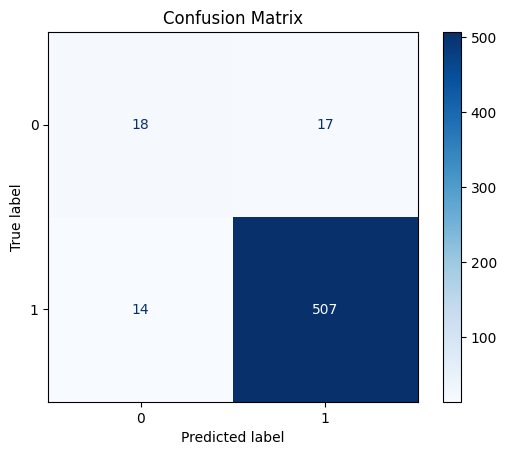

In [107]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

ROC Curve

In [108]:
from sklearn.metrics import RocCurveDisplay

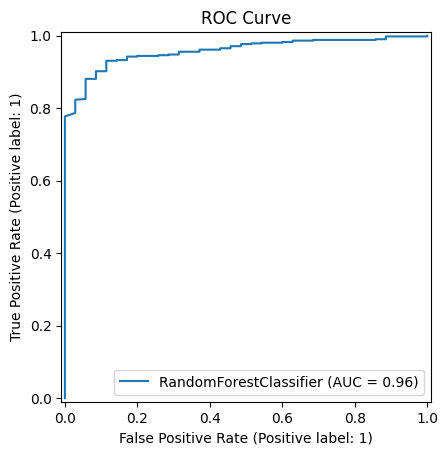

In [109]:
# Plot ROC curve
RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.title("ROC Curve")
plt.show()

Predict on Known Drugs

In [110]:
# Load the CSV file containing known drugs
known_drugs_df = pd.read_csv('known_drugs.csv')

# Display the first few rows
print("Known Drugs Dataset:")
display(known_drugs_df.head())

Known Drugs Dataset:


,Drug Name,Smiles
0,Upadacitinib,CC[C@@H]1CN(C[C@@H]1C2=CN=C3N2C4=C(NC=C4)N=C3)...
1,Abrocitinib,CCCS(=O)(=O)NC1CC(C1)N(C)C2=NC=NC3=C2C=CN3
2,Filgotinib,C1CC1C(=O)NC2=NN3C(=N2)C=CC=C3C4=CC=C(C=C4)CN5...
3,Oclacitinib,CNS(=O)(=O)CC1CCC(CC1)N(C)C2=NC=NC3=C2C=CN3
4,Ruxolitinib,C1CCC(C1)[C@@H](CC#N)N2C=C(C=N2)C3=C4C=CNC4=NC...


In [111]:
# Apply the function to the 'Smiles' column
morgan_fp_columns = [f"FP_{i}" for i in range(1024)]
known_drugs_df[morgan_fp_columns] = known_drugs_df['Smiles'].apply(generate_morgan_fingerprint).apply(pd.Series)


In [112]:
# Drop rows with invalid fingerprints (if any)
known_drugs_df = known_drugs_df.dropna(subset=morgan_fp_columns)

# Display the updated DataFrame
print("Known Drugs with Morgan Fingerprints:")
display(known_drugs_df.head())

Known Drugs with Morgan Fingerprints:


,Drug Name,Smiles,FP_0,FP_1,FP_2,FP_3,FP_4,FP_5,FP_6,FP_7,...,FP_1014,FP_1015,FP_1016,FP_1017,FP_1018,FP_1019,FP_1020,FP_1021,FP_1022,FP_1023
0,Upadacitinib,CC[C@@H]1CN(C[C@@H]1C2=CN=C3N2C4=C(NC=C4)N=C3)...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,Abrocitinib,CCCS(=O)(=O)NC1CC(C1)N(C)C2=NC=NC3=C2C=CN3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Filgotinib,C1CC1C(=O)NC2=NN3C(=N2)C=CC=C3C4=CC=C(C=C4)CN5...,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,Oclacitinib,CNS(=O)(=O)CC1CCC(CC1)N(C)C2=NC=NC3=C2C=CN3,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Ruxolitinib,C1CCC(C1)[C@@H](CC#N)N2C=C(C=N2)C3=C4C=CNC4=NC...,0,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [113]:
# Extract features (Morgan fingerprints)
X_known_drugs = known_drugs_df[morgan_fp_columns]

# Predict labels and probabilities
known_drugs_df['Label'] = best_model.predict(X_known_drugs)
known_drugs_df['Probability'] = best_model.predict_proba(X_known_drugs)[:, 1]

# Map Label to human-readable values (optional)
known_drugs_df['Label'] = known_drugs_df['Label'].map({1: 'Active', 0: 'Inactive'})

# Display the results
print("Prediction Results for Known Drugs:")
display(known_drugs_df[['Drug Name', 'Smiles', 'Label', 'Probability']])

Prediction Results for Known Drugs:


,Drug Name,Smiles,Label,Probability
0,Upadacitinib,CC[C@@H]1CN(C[C@@H]1C2=CN=C3N2C4=C(NC=C4)N=C3)...,Active,0.97
1,Abrocitinib,CCCS(=O)(=O)NC1CC(C1)N(C)C2=NC=NC3=C2C=CN3,Active,0.99
2,Filgotinib,C1CC1C(=O)NC2=NN3C(=N2)C=CC=C3C4=CC=C(C=C4)CN5...,Active,0.93
3,Oclacitinib,CNS(=O)(=O)CC1CCC(CC1)N(C)C2=NC=NC3=C2C=CN3,Active,0.80
4,Ruxolitinib,C1CCC(C1)[C@@H](CC#N)N2C=C(C=N2)C3=C4C=CNC4=NC...,Active,0.69
5,Baricitinib,CCS(=O)(=O)N1CC(C1)(CC#N)N2C=C(C=N2)C3=C4C=CNC...,Active,0.85


In [114]:
# Filter drugs with high confidence (Probability > 0.8)
high_confidence_drugs = known_drugs_df[known_drugs_df['Probability'] > 0.8]
print("High-Confidence Predictions:")
display(high_confidence_drugs[['Drug Name', 'Smiles', 'Label', 'Probability']])

High-Confidence Predictions:


,Drug Name,Smiles,Label,Probability
0,Upadacitinib,CC[C@@H]1CN(C[C@@H]1C2=CN=C3N2C4=C(NC=C4)N=C3)...,Active,0.97
1,Abrocitinib,CCCS(=O)(=O)NC1CC(C1)N(C)C2=NC=NC3=C2C=CN3,Active,0.99
2,Filgotinib,C1CC1C(=O)NC2=NN3C(=N2)C=CC=C3C4=CC=C(C=C4)CN5...,Active,0.93
5,Baricitinib,CCS(=O)(=O)N1CC(C1)(CC#N)N2C=C(C=N2)C3=C4C=CNC...,Active,0.85
